# Matrice projekcija

Sadržaj:
1. [Projekcija kao linearan operator](#Projekcija-kao-linearan-operator)
1. [Konstrukcija matrica ortogonalnih projekcija](#Konstrukcija-matrica-ortogonalnih-projekcija)
    1. [Projekcija na jednodimenzionalni potprostor](#Projekcija-na-jednodimenzionalni-potprostor)
    1. [Projekcija na proizvoljan potprostor](#Projekcija-na-proizvoljan-potprostor)
1. [Projekcija na afini potprostor](#Projekcija-na-afini-potprostor)

In [1]:
import numpy as np

import matplotlib as mplb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.linalg import null_space

***

## Projekcija kao linearan operator

Kvadratna matrica $P\in\mathcal{M}_{n\times n}$ za koju važi $P^2=P$ naziva se *matrica projekcije* ili samo projekcija (projection matrix). Ukoliko je projekcija $P$ i simetrična matrica $,P=P^T,$ tada se za $P$ koristi termin *ortogonalna projekcija* (orthogonal projection). 

Jednakost kojom se definišu matrice projekcije
$$P^2=P\ \Longleftrightarrow\ P^2-P=O\ \Longleftrightarrow\ P(P-I)=O$$ 
u potpunosti opisuju sopstvene vrednosti tih matrica, ${\rm Sp}(P)=\{0,1\}.$
Fundamentalni prostori matrice projekcije su i njeni sopstveni potprostori,
$$\mathcal{R}(P)=U_{\lambda=1},\qquad \mathcal{N}(P)=U_{\lambda=0}.$$

Matrice projekcije uvek poseduju spektralnu dekompoziciju.

Kada je $P$ matrica ortogonalne projekcije onda su još i njeni fundamentalni prostori $\mathcal{R}(P)$ i $\mathcal{N}(P)$ ortogonalni među sobom.
Zaista, ortogonalna projekcija $P$ je simetrična matrica. Zbog toga što se kolone matrice $P$ ponavljaju u njenim vrstama imamo jednakost odgovarajućih potprostora ove matrice
$$\mathcal{R}(A)=\mathcal{R}(A^T),\qquad \mathcal{N}(A)=\mathcal{N}(A^T).$$

Shodno tome je $\mathcal{R}(A)^{\perp}=\mathcal{N}(A).$

**Пример 1.** Дате су матрице $A=\begin{bmatrix}5&-8&-4\\3&-5&-3\\-1&2&2\end{bmatrix}$ и 
$P=\dfrac13\begin{bmatrix}2&-1&2\\-1&2&2\\2&2&-1\end{bmatrix}.$ 
Тестираћемо ове матрице да ли представљају пројекције и ортогоналне пројекције. 

In [2]:
A=np.array([[5.,-8,-4],[3,-5,-3],[-1,2,2]])
A@A==A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Видимо да је $A$ матрица пројекције. Проверићемо још да ли је ортогонална пројекција.

In [3]:
A.T==A

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

$A$ није ортогонална пројекција. 
Поновићемо тестове за матрицу $P.$

In [4]:
P=np.array([[1.,1,0],[1,1,0],[0,0,2]])/2
np.isclose(P@P,P)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

На основу спектралних декомпозиција ових матрица добијамо опис геометрија пресикавања које оне индукују $\mathcal{A}:v\mapsto Av,\quad$ $\mathcal{P}:v\mapsto Pv.$

In [5]:
D,V=np.linalg.eig(A)
np.round(D,3)

array([ 1., -0.,  1.])

In [6]:
np.round(V,3)

array([[ 0.845, -0.784,  0.06 ],
       [ 0.507, -0.588, -0.422],
       [-0.169,  0.196,  0.904]])

In [7]:
np.isclose(A@V,V*D)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [8]:
np.linalg.matrix_rank(V) , np.linalg.matrix_rank(A)

(3, 2)

На основу спектралне декомпозиције закључујемо да је $A$ пројекција на потпростор генерисан првом и трећом колоном матрице $V.$ Пројекција се врши паралелно потпростору који је генерисан вектором средње колоне матрице $V.$
Геометрију пресликавања можемо да анализирамо и кроз графички приказ слике јединичне сфере.

In [9]:
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)

In [10]:
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(100), KosFi)
jed_sfera=np.array([x.reshape(10000,),y.reshape(10000,),z.reshape(10000,)])
slike=A@jed_sfera
Xs=(slike[0]).reshape(100,100)
Ys=(slike[1]).reshape(100,100)
Zs=(slike[2]).reshape(100,100)

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


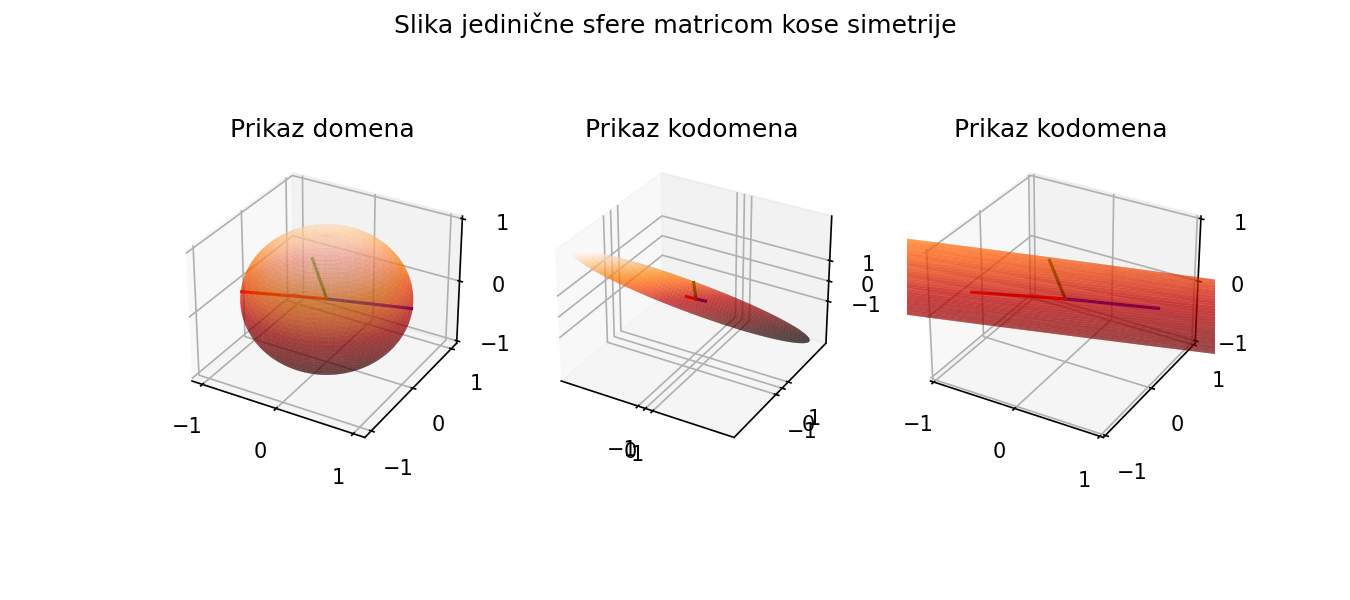

In [12]:
slika=plt.figure(figsize=(9,4)) 
slika.suptitle('Slika jedinične sfere matricom kose simetrije')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 3, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
ax1.plot_surface(x, y, z , cmap=mplb.cm.gist_heat, alpha=0.5);
ax1.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'b-');
ax1.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'r-');
ax1.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');

ax2 = slika.add_subplot(1, 3, 2, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-1,0, 1])
ax2.set_yticks([-1,0, 1])
ax2.set_zticks([-1,0, 1])
ax2.plot_surface(Xs, Ys, Zs , cmap=mplb.cm.gist_heat, alpha=0.5);
ax2.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'b-');
ax2.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'r-');
ax2.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');

ax3 = slika.add_subplot(1, 3, 3, projection='3d')
plt.title("Prikaz kodomena") 
ax3.set_xticks([-1,0, 1])
ax3.set_yticks([-1,0, 1])
ax3.set_zticks([-1,0, 1])
ax3.plot_surface(Xs, Ys, Zs , cmap=mplb.cm.gist_heat, alpha=0.5);
ax3.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'b-');
ax3.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'r-');
ax3.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1])
ax3.set_zlim([-1,1]);

In [13]:
%matplotlib inline

Sopstveni vektor matrice $A$ koji odgovara jezgru matrice je prilično blizu ravni projekcije. Zbog toga je zgodno da se kroz rotacije aktivne slike upoznaju odgovarajući sopstveni potprostori matrice $A.$

За матрицу $P,$ с обзиром да је симетрична, можемо да користимо специјализовану функцију за тај тип матрица.

In [14]:
D,V=np.linalg.eigh(P)
np.round(D,3)

array([0., 1., 1.])

In [15]:
np.round(V,3)

array([[-0.707,  0.707,  0.   ],
       [ 0.707,  0.707,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

Закључујемо да је $P$ пројекција на потпростор генерисан последњим двема колонама матрице $V.$ Језгро пресликавања је линеал над вектором прве колоне матрице $V.$ Направићемо и графички приказ овог пресликавања.

In [16]:
slike=P@jed_sfera
Xs=(slike[0]).reshape(100,100)
Ys=(slike[1]).reshape(100,100)
Zs=(slike[2]).reshape(100,100)

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


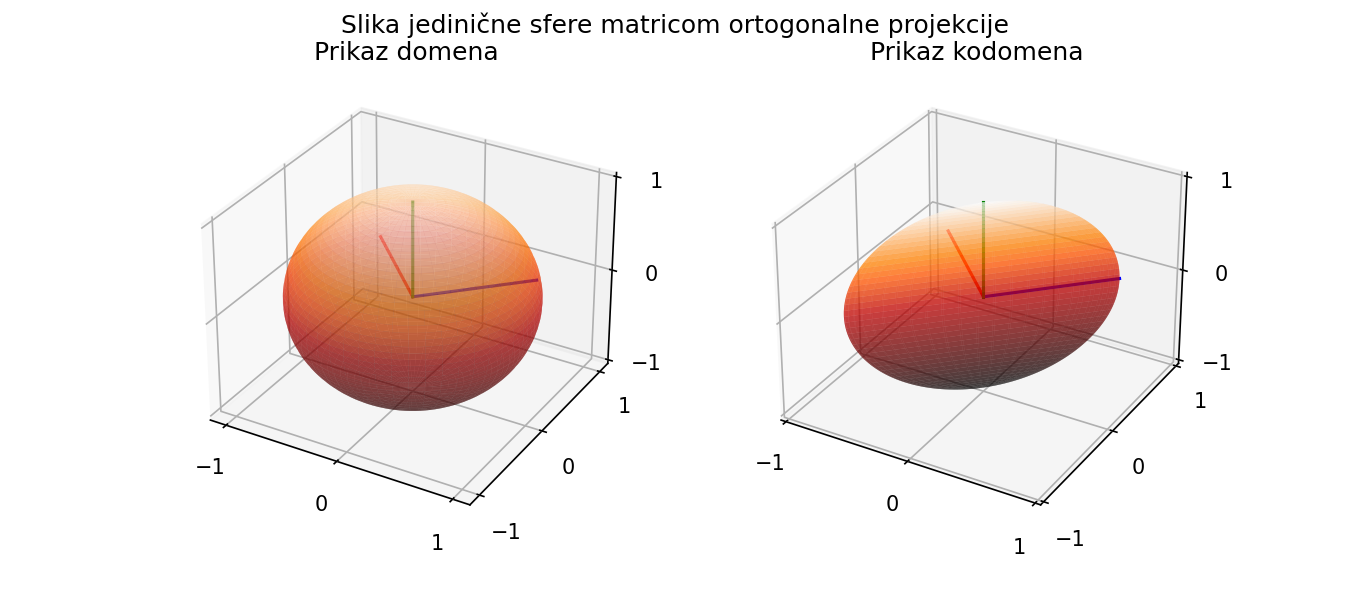

In [18]:
slika=plt.figure(figsize=(9,4)) 
slika.suptitle('Slika jedinične sfere matricom ortogonalne projekcije')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 2, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
ax1.plot_surface(x, y, z , cmap=mplb.cm.gist_heat, alpha=0.5)
ax1.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r-');
ax1.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'b-');
ax1.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');


ax2 = slika.add_subplot(1, 2, 2, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-1,0, 1])
ax2.set_yticks([-1,0, 1])
ax2.set_zticks([-1,0, 1])
ax2.plot_surface(Xs, Ys, Zs , cmap=mplb.cm.gist_heat, alpha=0.5);
ax2.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r-');
ax2.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'b-');
ax2.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1]);

In [19]:
%matplotlib inline

***

**Teorema 1.** Ako je $P$ matrica projekcije, onda je i $I-P$ projekcija.

Ako je $P$ matrica ortogonalne projekcije, onda je takva i matrica $I-P.$

**Dokaz :**

Pretpostavimo da je $P$ matrica projekcije, tj. da važi $P^2=P.$ Pokažimo da je onda takva i matrica $X=I-P.$
$$X^2=(I-P)^2=I-2P+P^2=I-2P+P=I-P=X.$$
Neka je sada još $P$ i simetrična, dakle da je $P=P^T.$ Tada je
$$X^T=(I-P)^T=I^T-P^T=I-P=X.\quad\Box$$

***

**Teorema 2.** Za matrice ortogonalne projekcija važi ortogonlano razlaganje 
$$\mathcal{R}(P)\oplus\mathcal{R}(I-P)=\mathbb{R}^n.$$

<div>
   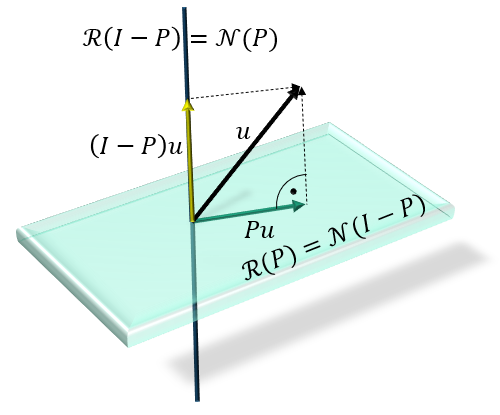  
</div>

**Dokaz :**

Pokažimo da je $\mathcal{R}(I-P)=\mathcal{N}(P).$ Kako je
$P(I-P)=P-P^2=P-P=O$ to je $\mathcal{R}(I-P)\subseteq\mathcal{N}(P).$

Jasno je da za proizvoljan vektor $v\in\mathbb{R}^n$ važi $v=Iv=(P+I-P)v=Pv+(I-P)v.$ Ova jednakost predstavlja ortogonalnu dekompoziciju vektora $v$ na zbir komponenti $Pv\in\mathcal{R}(P)$ i $(I-P)v\in\mathcal{N}(P).$ S obzirom da je takva dekompozicija jedinstvena to mora biti i $\mathcal{R}(I-P)=\mathcal{N}(P).\quad\Box$

***

Zbog jednakosti $v=Iv=(P+I-P)v=Pv+(I-P)v$ kažemo da su projekcije $P$ i $I-P$ komplementarne. Komplementarnost znači da projekcije slikaju na međusobno ortogonalne komplemente.

**Пример 2.** Искористићемо матрицу $P$ из примера 1. Дуалност са комплементарном пројекцијом $I-P$ можемо да уочимо кроз спектралну декомпозицију ове две матрице

In [20]:
Dp,Vp=np.linalg.eigh(P)
np.round(Dp,3)

array([0., 1., 1.])

In [21]:
np.round(Vp,3)

array([[-0.707,  0.707,  0.   ],
       [ 0.707,  0.707,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [22]:
I=np.eye(3)
D,V=np.linalg.eigh(I-P)
np.round(D,3)

array([0., 0., 1.])

In [23]:
np.round(V,3)

array([[-0.707,  0.   , -0.707],
       [-0.707,  0.   ,  0.707],
       [-0.   ,  1.   ,  0.   ]])

Из примера примећујемо да исти ортонормирани вектори разапињу фундаменталне потпросторе матрица $P$ и $I-P.$ Разлика се огледа у сопственим вредностима чији су то сопствени потпростори.
\begin{align}
&Pv=v=1\cdot v\quad\Longleftrightarrow\quad (I-P)v=v-Pv=v-v=\theta=0\cdot v,\\
&Pv=\theta=0\cdot v \quad\Longleftrightarrow\quad (I-P)v=v-Pv=v-\theta=v=1\cdot v.
\end{align}

In [24]:
slike1=jed_sfera-slike
Xs1=(slike1[0]).reshape(100,100)
Ys1=(slike1[1]).reshape(100,100)
Zs1=(slike1[2]).reshape(100,100)

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


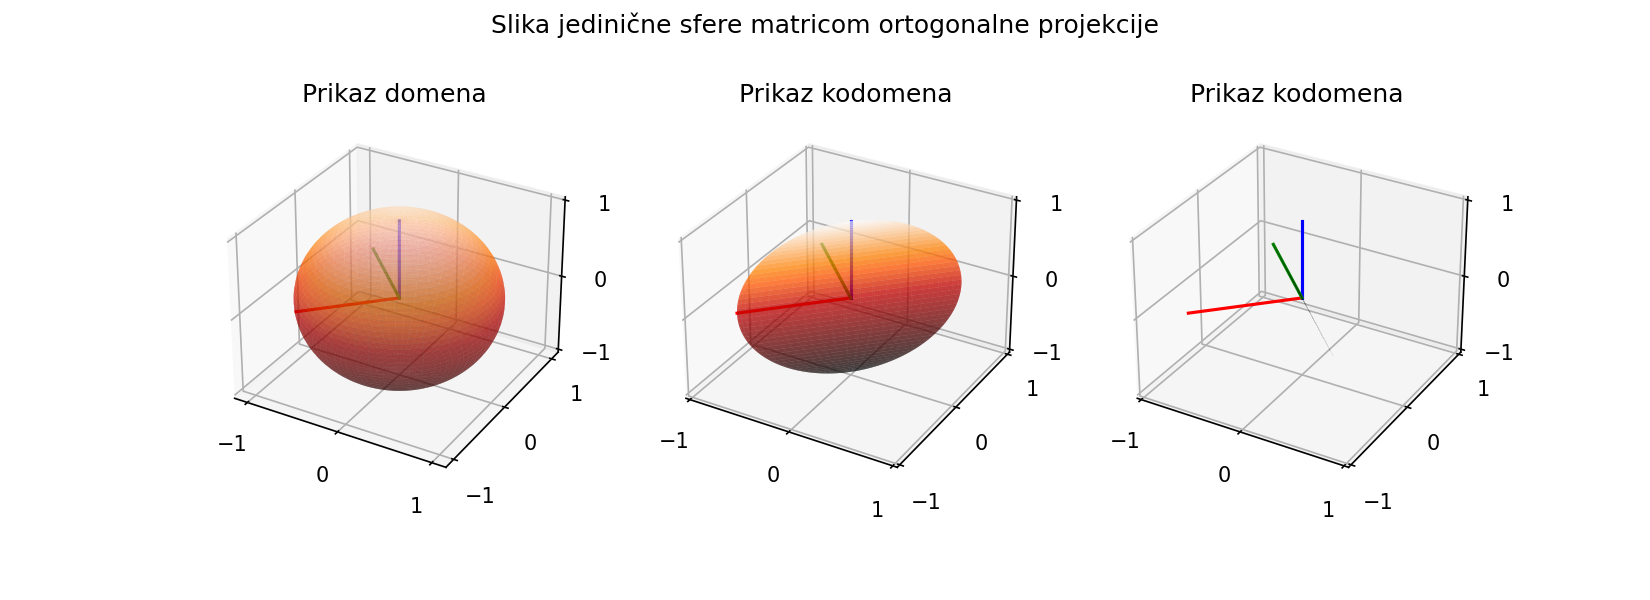

In [26]:
slika=plt.figure(figsize=(11,4)) 
slika.suptitle('Slika jedinične sfere matricom ortogonalne projekcije')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 3, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
ax1.plot_surface(x, y, z , cmap=mplb.cm.gist_heat, alpha=0.5)
ax1.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r-');
ax1.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'b-');
ax1.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');


ax2 = slika.add_subplot(1, 3, 2, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-1,0, 1])
ax2.set_yticks([-1,0, 1])
ax2.set_zticks([-1,0, 1])
ax2.plot_surface(Xs, Ys, Zs , cmap=mplb.cm.gist_heat, alpha=0.5);
ax2.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r-');
ax2.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'b-');
ax2.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1]);

ax2 = slika.add_subplot(1, 3, 3, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-1,0, 1])
ax2.set_yticks([-1,0, 1])
ax2.set_zticks([-1,0, 1])
ax2.plot_surface(Xs1, Ys1, Zs1 , cmap=mplb.cm.gist_heat, alpha=0.5);
ax2.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r-');
ax2.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'b-');
ax2.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'g-');
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1]);

In [27]:
%matplotlib inline

***

**Primer 3.** Neka je $S$ potprostor vektorskog prostora $\mathbb{R}^n,$ i neka su $s\in S$ i $u\in \mathbb{R}^n$ proizvoljni vektori.  
Kao što je pokazano, za vektor $u$ postoje jedinstveno određeni vektori $v\in S,\ w\in S^{\perp},\qquad v\perp w,$ za koje je $u=v+w.$ Vektor $v\in S$ je tada projekcija $u$ na $S,$ dok je $w$ projekcija $u$ na $S^{\perp},$ 
$$v={\rm Pr}_{S}\,u,\qquad w={\rm Pr}_{S^{\perp}}\,u.$$
Tada je 
$$u\cdot s=(v+w)\cdot s=v\cdot s+w\cdot s=v\cdot s+0=v\cdot s.$$
Dobijenu jednakost za skalarni proizvod možemo da zapišemo i u obliku
$$u\cdot s={\rm Pr}_{S}\,u\cdot s.$$

Interesantna posledica ovog zapisa glasi:
$$u\cdot {\rm Pr}_{S}\,u={\rm Pr}_{S}\,u\cdot{\rm Pr}_{S}\,u=\|{\rm Pr}_{S}\,u\|^2.$$

***

**Zadatak 1.** Ako za matricu $P$ važi da je $P=P^TP,$ pokazati da je $P$ ortogonalna projekcija.

**Rešenje :**


Primećujemo prvo da je matrica $P$ simetrična,
$$P^T=(P^TP)^T=P^TP=P.$$
Odatle je $P=P^TP=P^2,$ tj. matrica $P$ je matrica ortogonalne projekcije.

***

**Zadatak 2.** Neka je $P$ matrica ortogonalne projekcije na potprostor $R,$ $n-$dimenzionalnog realnog vektorskog prostora $\mathbb{R}^n.$ Šta predstavlja matrica $I-P?$	

**Rešenje :**


Matrica $I-P$ predstavlja ortogonalnu projekciju na potprostor $R^{\perp}.$ 

***

**Zadatak 3.** Neka je $P$ ortogonalna projekcija na potprostor $R,$ i $Q$ ortogonalna projekcija na potprostor $R^{\perp}.$ 

a) Šta predstavljaju matrice $P+Q$ i $PQ?$ 

b) Pokazati da je matrica $P-Q$ sama sebi inverzna matrica.
	

**Rešenje :**


a) S obzirom da je $Q=I-P$ to je $P+Q=P+I-P=I.$ Slično, $PQ=P(I-P)=P-P^2\stackrel{P^2=P}{=}P-P=O.$	

b) $P-Q=P-(I-P)=2P-I$
$$(P-Q)^2=(2P-I)^2=4P^2-4P+I\stackrel{P^2=P}{=}4P-4P+I=I.$$	

***

**Zadatak 4.**     Ukoliko ortogonalne projekcije $P_1$ i $P_2$ imaju međusobno ortogonalne prostore slika, 
tada je $P_1+P_2$ takođe ortogonalna projekcija. Dokazati.

**Rešenje :**

Uslov ortogonalnosti slika $\mathcal{R}(P_1)\perp\mathcal{R}(P_2)$ možemo da zapišemo u obliku matričnog množenja
$$\mathcal{R}(P_1)\perp\mathcal{R}(P_2)\quad \Longleftrightarrow\quad  (P_1^TP_2=O\ \wedge\ P_2^TP_1=O).
$$
Tada je
\begin{align}
    (P_1+P_2)^T&=P_1^T+P_2^T=P_1+P_2,\\
    (P_1+P_2)^2&=P_1^2+P_1P_2+P_2P_1+P_2^2
    =P_1+P_1^TP_2
    +P_2^T P_1+P_2\\
    &=P_1+P_2.
\end{align}

Prostor slika ove ortogonalne projekcije $P_1+P_2$ je direktna suma prostora slika projekcija sabiraka,
$$\mathcal{R}(P_1+P_2)=\mathcal{R}(P_1)\oplus\mathcal{R}(P_2).$$
Suma je direktna jer  su $\mathcal{R}(P_1)$ i $\mathcal{R}(P_2)$ međusobno ortogonalni.

***

## Konstrukcija matrica ortogonalnih projekcija

### Projekcija na jednodimenzionalni potprostor

Neka je jednodimenzionalni potprostor $V$ prostora $\mathbb{R}^n$  određen vektorom pravca $p=\begin{bmatrix} x_0&x_1& \dots&x_{n-1}\end{bmatrix}^T,$
$$V=\mathcal{L}(p).$$
Ortogonalna projekcija $u=Pv$ proizvoljnog vektora $v\in\mathbb{R}^n$ na pravac $V$ dobija se iz dva uslova:
- vektor $u$ je kolinearan sa $p,$ tj. $u=\lambda p;$
- vektor $v-u$ je ortogonalan na $p.$

Na osnovu postavljenih uslova, nalazimo 
$$(v-\lambda p)^Tp=0\quad\Longleftrightarrow\quad v^Tp-\lambda p^Tp=0 \quad\Longleftrightarrow\quad 
\lambda=\dfrac{v^Tp}{p^Tp}\,.
$$
Odatle je projekcija $$u=\dfrac{v\cdot p}{p\cdot p}\,p=\dfrac{p^Tv}{p^Tp}\,p.$$
Zbog toga je 
$$
\|u\|=\dfrac{|p^Tv|}{\|p\|^2}\,\|p\|=
\dfrac{\|v\|\,\|p\|\,|\cos\angle(v,p)|}{\|p\|}=\|v\|\,|\cos\angle(v,p)|.
$$
Rastojanje tačke sa vektorom položaja $v$ od pravca određenog vektorom $p$ je dužina vektora $v-u.$ 

<div>
   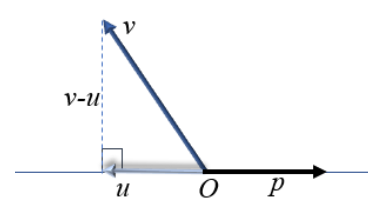  
</div>

Cilj nam je da odredimo projekcionu matricu $P$ kojom je moguće  izračunati ortogonalnu projekciju proizvoljnog vektora $v$ na pravac definisan sa $p.$ To znači da matrica $P$ zadovoljava uslove:
$$P^2=P\quad\mbox{i}\quad Pv=u=\dfrac{p^Tv}{p^Tp}\,p.$$
 Primetimo da je $u=\dfrac{p^Tv}{p^Tp}\,p=p\dfrac{p^Tv}{p^Tp},$ jer je $\dfrac{p^Tv}{p^Tp}$ skalar. Odatle je 
$$u=\dfrac{p\,p^T}{p^Tp}\,v\ \Longrightarrow\ P=\dfrac{p\,p^T}{p^Tp}\,.$$
Ukoliko sa $p_0=\dfrac{p}{\|p\|}$ označimo jedinični (normiran) vektor u pravcu vektora $p,$ tada je 
$$
P=\dfrac{p\,p^T}{p^Tp}=p_0p_0^T.
$$ 
Matricu $P$ zovemo elementarna projekcija na pravac određen jediničnim vektorom $p_0.$
Ova projekciona matrica je ranga 1 jer je projekcija na jednodimenzionalni potprostor $\mathcal{L}(p_0).$ Jezgro elementarne projekcije je potprostor ortogonalan na $\mathcal{L}(p_0)=\mathcal{L}(p),$
$$\mathcal{N}(P)=\mathcal{L}(p)^{\perp}.$$

***

### Projekcija na proizvoljan potprostor

Neka je $Q\in\mathcal{M}_{m\times n}$ pravougaona matrica $(n\neq m)$ sa ortonormiranim kolonama, tj. važi $Q^TQ=I_n.$ Naravno, pod tim uslovima mora biti $m>n$ i ${\rm rang}(Q)=n.$ Tada je matrica $P=QQ^T$ ortogonalna projekcija. Tvrđenje je posledica narednih jednakosti.
\begin{align}
P^2&=(QQ^T)^2=(QQ^T)(QQ^T)=Q(Q^TQ)Q^T=QI_nQ^T=QQ^T=P,\\
P^T&=(QQ^T)^T=(Q^T)^TQ=QQ^T=P.
\end{align}
Pokazaćemo da je $\mathcal{R}(P)=\mathcal{R}(Q),$ tj. kolone matrice $Q$ su ortonormirana baza prostora slika $\mathcal{R}(P).$

Ukoliko matricu $Q$ posmatramo kroz njene ortonormirane kolone, tj. ako uvedemo oznake kolona  
$$Q=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\q_0\\\phantom{i}\end{array}\!\!
&\,q_1\,&\dots&q_{n-1} \end{array}\right],$$ 
matrica projekcije $P=QQ^T$ može se predstaviti zbirom spoljašnjih proizvoda vektora $q_i:$
$$P=QQ^T=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\q_0\\\phantom{i}\end{array}\!\!
&\,q_1\,&\dots&q_{n-1} \end{array}\right]
\left[\begin{array}{ccc}
&q_0^T&\\[4pt]\hline&\,q_1\,&\\[4pt]\hline &\vdots&\\\hline &q_{n-1}& \end{array}\right] 
=q_0q_0^T+q_1q_1^T+\dots+q_{n-1}q_{n-1}^T.$$

Matrica $P$ samim tim predstavlja zbir ortogonalnih projekcija 
$$P=P_0+P_1+\dots+P_{n-1},\quad P_i=q_iq_i^T.$$
koje imaju međusobno ortogonalne prostore slika. U zadatku 4 smo pokazali da je $P$ takođe matrica ortogonalne projekcije čiji je prostor slika direktna suma prostora slika projekcija sabiraka
$$\mathcal{R}(P)=\mathcal{L}(q_0,q_1,\dots,q_{n-1}).$$

Primetimo, ako je $\widehat{v}=Pv$ projekcija vektora $v$ na $\mathcal{L}(q_0,q_1,\dots,q_{n-1}),$ koordinate vektora $\widehat{v}$ u odnosu na bazu sastavljnu od vektora $q_0,q_1,\dots,q_{n-1}$ su Furijeove koordinate date sa $Q^Tv.$ 
\begin{align}
\widehat{v}&=\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1},\qquad \alpha_j=\widehat{v}\cdot q_j=v\cdot q_j=q_j^Tv,\\
\Longrightarrow&\quad \begin{bmatrix}\alpha_0\\\alpha_1\\\vdots\\\alpha_{n-1}\end{bmatrix}=Q^Tv,\qquad \widehat{v}=QQ^Tv=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\q_0\\\phantom{i}\end{array}\!\!
&\,q_1\,&\dots&q_{n-1} \end{array}\right]
\begin{bmatrix}\alpha_0\\\alpha_1\\\vdots\\\alpha_{n-1}\end{bmatrix}.
\end{align}

**Primer 4.** Odredićemo matricu projekcije na pravac određen vektorom $p=\begin{bmatrix}1&2&2\end{bmatrix}^T.$

In [28]:
p=np.array([1,2,2])
P=np.outer(p,p)/np.dot(p,p)
P

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

Proverimo da li matrica $P$ zaista ima osobinu da vektor $p$ slika u samog sebe, a sve vektore ortogonalne na $p$ slika u nula-vektor.

In [29]:
np.round(P@p,2)

array([1., 2., 2.])

In [30]:
p_perp=null_space(p.reshape(1,3))
p_perp

array([[-0.66666667, -0.66666667],
       [ 0.66666667, -0.33333333],
       [-0.33333333,  0.66666667]])

In [31]:
np.round(P@p_perp,2)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

***

**Zadatak 5.** Odrediti matricu projekcije na pravac određen vektorom $p=\begin{bmatrix}1&-1&2\end{bmatrix}^T.$
	

**Rešenje :**


Vektor $p$ nije normiran. Zbog toga matrica projekcije $P$ na jednodimenzionalni potprostor $V=\mathcal{L}(p)$ je data izrazom	$P=\dfrac{pp^T}{p^Tp},$
$$P=\dfrac{\begin{bmatrix}1\\-1\\2\end{bmatrix}\begin{bmatrix}1&-1&2\end{bmatrix}}{\begin{bmatrix}1&-1&2\end{bmatrix}\begin{bmatrix}1\\-1\\2\end{bmatrix}}=\dfrac16\begin{bmatrix}1&-1&2\\-1&1&-2\\2&-2&4\end{bmatrix}.$$

In [32]:
p=np.array([1,-1,2])
P=np.outer(p,p)/np.dot(p,p)
print(P)

[[ 0.16666667 -0.16666667  0.33333333]
 [-0.16666667  0.16666667 -0.33333333]
 [ 0.33333333 -0.33333333  0.66666667]]


Provera rezultata:

In [33]:
np.round(P@p,2)

array([ 1., -1.,  2.])

In [34]:
p_perp=null_space(p.reshape(1,3))
p_perp

array([[ 0.40824829, -0.81649658],
       [ 0.88164966,  0.23670068],
       [ 0.23670068,  0.52659863]])

In [35]:
np.round(P@p_perp,2)

array([[ 0., -0.],
       [-0.,  0.],
       [ 0., -0.]])

***

**Zadatak 6.** Dat je jedinični vektor $u=\begin{bmatrix}\dfrac{1}{6}&-\dfrac{1}{6}&\dfrac{5}{6}&\dfrac{3}{6}\end{bmatrix}^T.$ Konstruisati matricu elementarne projekcije $P$ na potprostor $\mathcal{L}(u).$

a) Pokazati da je $u$ spstveni vektor matrice $P.$ Kojoj sopstvenoj vrednosti odgovara $u?$

b) Orediti orotogonalnu bazu sopstvenog potprostora koji odgovara sopstvenoj vrednosti $\lambda=0.$

**Rešenje :**


In [36]:
u=np.array([1/6,-1/6,5/6,3/6])
np.linalg.norm(u)

1.0

In [37]:
P=np.outer(u,u)
print(P)

[[ 0.02777778 -0.02777778  0.13888889  0.08333333]
 [-0.02777778  0.02777778 -0.13888889 -0.08333333]
 [ 0.13888889 -0.13888889  0.69444444  0.41666667]
 [ 0.08333333 -0.08333333  0.41666667  0.25      ]]


a) Vektor $u$ je normiran, pa za njega važi $u^Tu=1.$ Zbog toga je 
$$Pu=(uu^T)u=u(u^Tu)=u.$$
Zaključujemo da je $u$ sopstveni vektor matrice $P$ koji odgovara sopstvenoj vrednosti $\lambda=1.$

Provera rezultata:

In [38]:
np.round(P@u-u,2)

array([ 0., -0.,  0.,  0.])

b)  Iskoristićemo ugrađenu funkciju za izračunavanje jezgra matrice. 

In [39]:
u_perp=null_space(u.reshape(1,4))
np.round(P@u_perp)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0., -0., -0.],
       [ 0., -0., -0.]])

In [40]:
u_perp

array([[ 0.16666667, -0.83333333, -0.5       ],
       [ 0.97619048,  0.11904762,  0.07142857],
       [ 0.11904762,  0.4047619 , -0.35714286],
       [ 0.07142857, -0.35714286,  0.78571429]])

***

**Zadatak 7.** Naći matrice $P_1$ i $P_2$ projekcija na pravce $p_1=\begin{bmatrix}1&1&2&1\end{bmatrix}^T$ i $p_2=\begin{bmatrix}1&1&-1&0\end{bmatrix}^T.$ Objasni vrednost proizvoda $P_1P_2.$	

**Rešenje :**


In [41]:
p1=np.array([1,1,2,1])
P1=np.outer(p1,p1)/np.dot(p1,p1)
print(P1)

[[0.14285714 0.14285714 0.28571429 0.14285714]
 [0.14285714 0.14285714 0.28571429 0.14285714]
 [0.28571429 0.28571429 0.57142857 0.28571429]
 [0.14285714 0.14285714 0.28571429 0.14285714]]


In [42]:
p2=np.array([1,1,-1,0])
P2=np.outer(p2,p2)/np.dot(p2,p2)
print(P2)

[[ 0.33333333  0.33333333 -0.33333333  0.        ]
 [ 0.33333333  0.33333333 -0.33333333  0.        ]
 [-0.33333333 -0.33333333  0.33333333  0.        ]
 [ 0.          0.          0.          0.        ]]


In [43]:
np.round(P1@P2,4)

array([[ 0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.]])

Dobijeni rezultat posledica je ortogonalnosti vektora $p_1$ i $p_2.$
$$P_1P_2=\dfrac{p_1p_1^T}{p_1^Tp_1}\dfrac{p_2p_2^T}{p_2^Tp_2}=\dfrac{p_1(p_1^Tp_2)p_2^T}{\|p_1\|^2\,\|p_2\|^2}=O.$$

In [44]:
np.dot(p1,p2)

0

Ukoliko bi bilo potrebno da odredimo matricu ortogonalne projekcije na $\mathcal{L}(p_1,p_2),$ ona će biti jednaka $P_1+P_2.$ 

***

**Primer 5.** Kreiraćemo matricu projekcije na potprostor generisan ortonormiranim vektorima. Za generisanje slučajne ortogonalne matrice možemo da koristimo [`ortho_group`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ortho_group.html) ugrađenu biblioteku. Time ćemo generisati skupove slučajnih ortonormiranih vektora kao podskupove vrsta ili kolona ortogonalnih matrica. Broj kolona koje ćemo upotrebiti za formiranje matrice $Q$ odredićemo izborom slučajnog broja $r.$ To će predstavljati i rang matrice projekcije $P=QQ^T.$

In [45]:
from scipy.stats import ortho_group
from numpy.random import randint

In [46]:
n=randint(5,10) #dimenzija ortogonalne matrice 
r=randint(1,n) #rang matrice projekcije
print('rang=',r,', dimenzija=',n)
Ortog=ortho_group.rvs(n)
np.round(Ortog,2)

rang= 1 , dimenzija= 5


array([[ 0.76, -0.47,  0.41,  0.15,  0.07],
       [ 0.44, -0.01, -0.82, -0.18,  0.33],
       [ 0.39,  0.88,  0.25,  0.02,  0.11],
       [-0.05,  0.05, -0.22,  0.97,  0.06],
       [-0.26, -0.07,  0.24, -0.01,  0.93]])

Možemo i da potvrdimo da se zaista radi o ortogonalnoj matrici.

In [47]:
np.round(Ortog@Ortog.T,2)

array([[ 1.,  0.,  0., -0.,  0.],
       [ 0.,  1., -0.,  0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [-0.,  0., -0.,  1., -0.],
       [ 0., -0., -0., -0.,  1.]])

Uzimamo prvih $r$ kolona ortogonalne matrice za kreiranje matrice $Q$ sa ortonormiranim kolonama. Matrica ortogonalne projekcije na prostor kolna $Q$ je $P=QQ^T.$

In [48]:
Q=Ortog[:,:r]
np.round(Q,2)

array([[ 0.76],
       [ 0.44],
       [ 0.39],
       [-0.05],
       [-0.26]])

In [49]:
P=Q@Q.T  #matrica projekcije
np.round(P,2)

array([[ 0.58,  0.34,  0.3 , -0.03, -0.2 ],
       [ 0.34,  0.19,  0.17, -0.02, -0.11],
       [ 0.3 ,  0.17,  0.15, -0.02, -0.1 ],
       [-0.03, -0.02, -0.02,  0.  ,  0.01],
       [-0.2 , -0.11, -0.1 ,  0.01,  0.07]])

Geometrijske karakteristike dobijene projekcije pročitaćemo iz spektralne dekompozicije.

In [53]:
D,V=np.linalg.eigh(P)
np.round(D,2)

array([-0., -0.,  0.,  0.,  1.])

In [51]:
np.round(V,2)

array([[ 0.51, -0.05, -0.24,  0.3 ,  0.76],
       [-0.2 ,  0.01, -0.12, -0.87,  0.44],
       [-0.25,  0.26,  0.83,  0.14,  0.39],
       [ 0.01,  0.96, -0.28,  0.03, -0.05],
       [ 0.79,  0.1 ,  0.39, -0.37, -0.26]])

In [54]:
np.round(P@Ortog,2)

array([[ 0.76, -0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.44, -0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.39,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.05,  0.  , -0.  , -0.  , -0.  ],
       [-0.26,  0.  , -0.  , -0.  ,  0.  ]])

Objasnite dobijeni rezultat proizvoda iz poslednje kodne ćelije.

***

**Primer 6.** Potražićemo matricu projekcije $P_A$ na prostor kolona matrice $A\in\mathcal{M}_{m\times n},$ ranga $n.$ Naglašavamo da uslov ranga ${\rm rang}(A)=n$ znači da su kolone matrice $A$ linearno nezavisne, tj. čine bazu prostora $\mathcal{R}(A).$ Osim toga, $S=A^TA$ je dekompozicija punog ranga za rezultujuću matricu $S.$ Kako je $A^TA\in\mathcal{M}_{n\times n}$ i ${\rm rang}(A)=n,$ to je $A^TA$ regularna matrica.

Uvedimo oznake vektora kolona matrice $A:$
$$A=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\a_0\\\phantom{i}\end{array}\!\!
&\,a_1\,&\dots&a_{n-1} \end{array}\right].$$

Matrica $P_A$ bi trebalo da proizvoljan vektor $v$ slika u vektor $u\in\mathcal{R}(A),$ tj. u vektor koji je linearna kombinacija kolona matrice $A,$ $u=\lambda_0a_0+\lambda_1a_1+\dots+\lambda_{n-1}a_{n-1},$
$$P_Av=u=A\Lambda,\qquad \Lambda=\begin{bmatrix}\lambda_0&\lambda_1&\dots&\lambda_{n-1}\end{bmatrix}^T.$$

Slika $u=P_Av$ je sa osobinom $v-u\perp\mathcal{R}(A),$ što zapisujemo $A^T(v-u)=\theta.$
$$
\Longleftrightarrow\quad A^T(v-A\Lambda)=\theta
\quad\Longleftrightarrow\quad  A^Tv=A^TA\Lambda
$$
Matrica $A^TA$ je regularna matrica i postoji njen inverz. Zbog toga je
$$\Lambda=(A^TA)^{-1}A^Tv\quad\Longrightarrow\quad u=A\Lambda=A(A^TA)^{-1}A^Tv\quad\Longrightarrow\quad 
P_A=A(A^TA)^{-1}A^T.$$

Da je $P_A$ zaista ortogonalna projekcija možemo da proverimo kroz test jednakosti $P^2=P=P^T.$ Proveravamo simetričnost matrice $P_A:$
$$P_A^T=\big(A(A^TA)^{-1}A^T\big)^T
=A\big((A^TA)^{-1}\big)^TA^T=A\big((A^TA)^T\big)^{-1}A^T
=A(A^TA)^{-1}A^T=P_A.$$	

Proveravamo idempotentnost matrice $P_A:$
$$P_A^2=A\underbrace{(A^TA)^{-1}A^TA}_I(A^TA)^{-1}A^T=A(A^TA)^{-1}A^T=P_A.$$

***

**Primer 7.** Izračunaćemo matricu projekcije na prostor kolona matrice $A=\begin{bmatrix}1&0\\1&1\\1&2\\1&-1\end{bmatrix}.$

In [55]:
A=np.array([[1,0],[1,1],[1,2],[1,-1]])
B=A.T@A
P=A@np.linalg.inv(B)@A.T
P

array([[ 0.3,  0.2,  0.1,  0.4],
       [ 0.2,  0.3,  0.4,  0.1],
       [ 0.1,  0.4,  0.7, -0.2],
       [ 0.4,  0.1, -0.2,  0.7]])

In [56]:
v=np.array([1,1,1,1])
P@v

array([1., 1., 1., 1.])

In [57]:
u=np.array([-1,-1,1,1])   #ortogonalan na kolone matrice A
P@u

array([0., 0., 0., 0.])

In [58]:
np.round(P@A,2)

array([[ 1., -0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1., -1.]])

Vidimo da su kolone matrice $A$ zaista nepokretni vektori ovog preslikavanja.

In [59]:
ker=null_space(A.T)
np.round(P@ker,2)

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-0.,  0.]])

Jezgro matrice $P$ čine svi vektori ortogonalni na kolone matrice $A.$ To su vektori baze prostora kolona matrice $I-P.$

In [60]:
np.round((np.eye(4)-P)@A,2)

array([[ 0.,  0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0.,  0.]])

***

**Zadatak 8.** Naći projekciju vektora $b=\begin{bmatrix}2\\0\\3\\1\end{bmatrix}$ na prostor kolona matrice $V=\begin{bmatrix}1&1\\1&-1\\2&1\\0&-2\end{bmatrix}.$
	

**Rešenje :**

Kolone matrice $V$ jesu linearno nezavisne (ali nisu ortogonalne), pa predstavljaju bazu prostora $\mathcal{R}(V).$ Matrica projekcije je tada data sa $P=V(V^TV)^{-1}V^T.$ Tražena projekcija je tada $Pb.$

In [61]:
V=np.array([[1,1],[1,-1],[2,1],[0,-2]])
b=np.array([2,0,3,1]).reshape(4,1)
M=np.transpose(V)@V
M1=np.linalg.inv(M)
V@(M1@(np.transpose(V)@b))

array([[ 1.36842105],
       [ 1.26315789],
       [ 2.68421053],
       [-0.10526316]])

***

**Zadatak 9.** Odrediti matricu projekcije u 3D na ravan $x-y+z=0.$	

**Rešenje :**


<code style="background:lightgreen;color:black">**I način:**</code> Matricu projekcije $P$ na ravan $\alpha:\ x-y+z=0,$ najlakše ćemo odrediti kao komplementarnu projekciju projekciji na vektor normale te ravni $n=\begin{bmatrix}1&-1&1\end{bmatrix}^T.$ 
<div>
   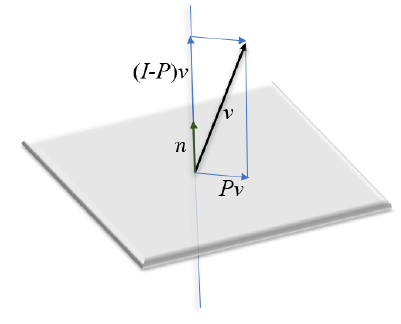  
</div>

Ako je $I-P=P_n=\dfrac{nn^T}{n^Tn}$ projekcija na pravac određen vektorom normale $n,$ tada je projekcija na ravan $\alpha$ data sa $P=I-P_n=I-\dfrac{nn^T}{n^Tn}.$

In [62]:
n=np.array([1,-1,1])
I3=np.eye(3)
P=np.outer(n,n)/np.dot(n,n)
print(I3-P)

[[ 0.66666667  0.33333333 -0.33333333]
 [ 0.33333333  0.66666667  0.33333333]
 [-0.33333333  0.33333333  0.66666667]]


<code style="background:lightgreen;color:black">**II način:**</code> Odredićemo jednu bazu ravni $\alpha,$ tj. dva linearno nezavisna vektora te ravni. S obzirom da ravan $\alpha$ sadrži koordinatni početak, odredićemo dve tačke te ravni tako da nisu kolinearne sa koordinatnim početkom.

Iz jednačine ravni $\alpha:\ x-y+z=0$ nalazimo vektore (tačke) npr. $a=\begin{bmatrix} 1&1&0\end{bmatrix}^T$ i $b=\begin{bmatrix} 0&1&1\end{bmatrix}^T.$ Ukoliko primenimo Gram-Šmitov postupak na vektore $a$ i $b$ dobićemo ortonormiranu bazu ravni $\alpha.$ 

In [63]:
a=np.array([1,1,0])
b=np.array([0,1,1])
c=np.linalg.norm(a)
q1=a/c
q2=b-np.dot(q1,b)*q1
c=np.linalg.norm(q2)
q2=q2/c
Q=np.transpose([q1,q2])
print(Q)

[[ 0.70710678 -0.40824829]
 [ 0.70710678  0.40824829]
 [ 0.          0.81649658]]


Matrica $Q$ sa kolonama $q_1$ i $q_2$ definiše projekciju na ravan $\alpha$ sa $P=QQ^T.$

In [64]:
print(Q@Q.T)

[[ 0.66666667  0.33333333 -0.33333333]
 [ 0.33333333  0.66666667  0.33333333]
 [-0.33333333  0.33333333  0.66666667]]


Ukoliko ne bismo ortonormirali bazu $\{a,b\},$ matrica projekcije se može dobiti preko matrice $A=[a\ |\ b],$ čije su kolone vektori $a$ i $b.$ Tada je $P=A(A^TA)^{-1}A^T.$ 

***

**Zadatak 10.** Naći matricu ortogonalne projekcije na prostor kolona matrice $A,$
	$$A=\begin{bmatrix}1&2&-1\\2&4&1\end{bmatrix}.$$

**Rešenje :**

Odredimo najpre prostor kolona matrice $A.$ Kako su prva i druga kolona matrice očigledno linearno zavisne, dobijamo da je $\mathcal{R}(A)=\mathcal{L}\left(\begin{bmatrix}1\\2\end{bmatrix},\begin{bmatrix}-1\\1\end{bmatrix}\right)=\mathbb{R}^2.$ 
Projekcija $P$ mora biti punog ranga da bi slikala $\mathbb{R}^2$ na $\mathbb{R}^2,$ pa je tražena ortogonalna projekcija $P=I.$

***

**Zadatak 11.** Neka je $A=\begin{bmatrix}1&2&0\\2&4&1\\1&2&0\end{bmatrix}$ i $b=\begin{bmatrix}1\\1\\1\end{bmatrix}.$

a) Odrediti matrice ortogonalnih projekcija na svaki od 4 fundamentalna prostora matrice $A.$

b) Naći vektor prostora $\mathcal{N}(A)^{\perp}$ najbliži vektoru $b.$
	

**Rešenje :**

a) Četiri fundamentalna prostora koja opisuju matricu su $\mathcal{R}(A),\ \mathcal{N}(A),\ \mathcal{R}(A^T)$	i $\mathcal{N}(A^T).$ Njih ćemo najlakše dobiti iz faktorizacije punog ranga matrice $A.$ Potražimo LU faktorizaciju matrice $A:$
$$A=\begin{bmatrix}1&2&0\\2&4&1\\1&2&0
\end{bmatrix}\to\begin{bmatrix}1&2&0\\0&0&1\\0&0&0\end{bmatrix}$$
$$\Longrightarrow\ A=\begin{bmatrix}1&0&0\\2&1&0\\1&0&1\end{bmatrix}
\begin{bmatrix}1&2&0\\0&0&1\\0&0&0\end{bmatrix}=
\begin{bmatrix}1&0\\2&1\\1&0\end{bmatrix}\begin{bmatrix}1&2&0\\0&0&1\end{bmatrix}=LU$$
Na osnovu dobijene dekompozicije punog ranga imamo da je
\begin{align}
&\mathcal{R}(A)=\mathcal{R}(L),&& \mathcal{N}(A)=\mathcal{N}(U)\\ 
&\mathcal{R}(A^T)=\mathcal{R}(U^T), && \mathcal{N}(A^T)=\mathcal{N}(L^T). \end{align}
\begin{align}
   &\mathcal{R}(A)=\mathcal{L}
   \left(\begin{bmatrix}1&2&1\end{bmatrix}^T,\begin{bmatrix}0&1&0\end{bmatrix}^T\right) ,&
   &\mathcal{N}(A)=\mathcal{L}
   \left(\begin{bmatrix}-2&1&0\end{bmatrix}^T\right)=\mathcal{L}(v),\\
   &\mathcal{R}(A^T)=\mathcal{L}
   \left(\begin{bmatrix}1&2&0\end{bmatrix}^T,\begin{bmatrix}0&0&1\end{bmatrix}^T\right) ,&
   &\mathcal{N}(A^T)=\mathcal{L}
   \left(\begin{bmatrix}-1&0&1\end{bmatrix}^T\right)=\mathcal{L}(u).
\end{align}

S obzirom da važe sledeće ortogonalne sume:
$$ \mathcal{R}(A)\oplus\mathcal{N}(A^T)=\mathbb{R}^3=\mathcal{R}(A^T)\oplus\mathcal{N}(A),$$
dovoljno je naći matrice projekcija na jezgra. Projekcije na prostore slika biće komplementarna preslikavanja.

In [65]:
L=np.array([[1,0],[2,1.],[1,0]])
U=np.array([[1,2,0.],[0,0,1]])
A=L@U
v=null_space(U)
u=null_space(L.T)
v , u

(array([[ 0.89442719],
        [-0.4472136 ],
        [ 0.        ]]),
 array([[-7.07106781e-01],
        [ 3.51811716e-17],
        [ 7.07106781e-01]]))

Projekcija na $\mathcal{N}(A):$

In [66]:
kerA=null_space(A)
P1=np.outer(v,v)
np.round(P1@kerA-kerA,2)

array([[-0.],
       [-0.],
       [ 0.]])

Projekcija na $\mathcal{R}(A^T):$

In [67]:
I3=np.eye(3)
P2=I3-P1
np.round(P2@A.T-A.T,2)

array([[ 0.,  0.,  0.],
       [-0., -0., -0.],
       [ 0.,  0.,  0.]])

Projekcija na $\mathcal{N}(A^T):$

In [68]:
kerA_T=null_space(A.T)
P3=np.outer(u,u)
np.round(P3@kerA_T-kerA_T,2)

array([[ 0.],
       [-0.],
       [ 0.]])

Projekcija na $\mathcal{R}(A):$

In [69]:
P4=I3-P3
np.round(P4@A-A,2)

array([[-0., -0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., -0.]])

b) Kako je $\mathcal{N}(A)^{\perp}=\mathcal{R}(A^T),$ to je najbliži vektor ovog potprostora vektoru $b$ njegova ortogonalna projekcija na $\mathcal{R}(A^T).$ 

In [70]:
b=np.ones(3)
P2@b

array([0.6, 1.2, 1. ])

***

## Projekcija na afini potprostor

Do sada analizirali smo postupke izračunavanja projekcije vektora na određeni potprostor. U ovom delu prikazaćemo rešenje problema projekcije tačke na afini potprostor. 
<div>
   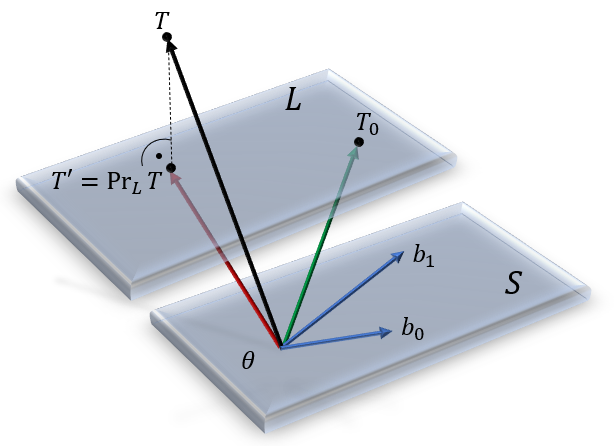  
</div>

Neka je $L=T_0+S$ afini potprostor sa direktrisom $S=\mathcal{L}(b_0,b_1,\dots,b_r)$ i $T\in\mathbb{R}^n$ neka tačka čiju ortogonalnu projekciju tražimo. Cilj jeste da postavljeni problem projekcije tačke na afini potprostor prevedemo u prethodno rešen problem - projekcija vektora na vektorski potprostor. 

Translacijom afinog potprostora $L-T_0=S$ dobijamo vektorski potprostor, njegovu direktrisu. Zbog toga izvršimo translaciju svih podataka za $T_0.$  
\begin{align}
\overrightarrow{TT'}&\perp L\quad\Longleftrightarrow\quad \overrightarrow{TT'}\perp S=L-T_0,\\
\overrightarrow{TT'}&=T'-T=(T'-T_0)-(T-T_0)=\overrightarrow{T_0T'}-\overrightarrow{T_0T}.
\end{align}

<div>
   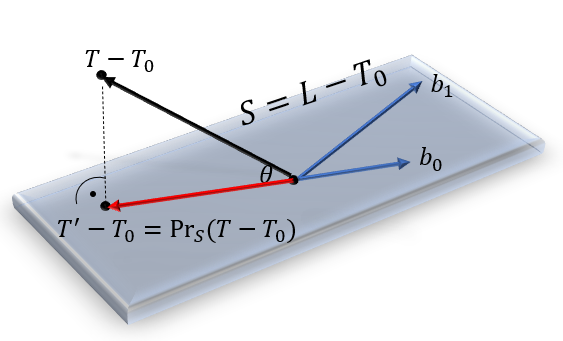  
</div>

Postupak rešavanja problema projekcije shodno ima sledeće korake:
1. Odredimo jednu tačku $T_0$ afinog potprostora $L.$
1. Izvršimo translaciju tačke $T$ za $T_0,$ $T-T_0=\overrightarrow{T_0T}.$
1. Projektujemo vektor $\overrightarrow{T_0T}$ na potprostor direktrise $S$ i dobijemo vektor $\overrightarrow{T_0T'}.$
1. Transliramo tačku $T_0$ za $\overrightarrow{T_0T'},$ $T_0+\overrightarrow{T_0T'}=T_0+T'-T_0=T'.$

$${\rm Pr}_L(T)=T_0+{\rm Pr}_S\big(\overrightarrow{T_0T}\,\big).$$

**Primer 8.** Odredićemo rastojanje tačke $T=\begin{bmatrix}1&1&1\end{bmatrix}$ od ravni $\alpha:\ 3x-2y+z=4.$ Jedna tačka ravni $\alpha$ je npr. $T_0=\begin{bmatrix}1&0&1\end{bmatrix}.$ Direktrisa ravni $\alpha$ je potprostor $n^{\perp},$ $n=\begin{bmatrix}3&-2&1\end{bmatrix}.$ Rastojanje tačke $T$ biće jednako dužini projekcije vektora $\overrightarrow{T_0T}$ na $\mathcal{L}(n).$

In [71]:
T=np.array([1,1,1])
T0=np.array([1,0,1])
n=np.array([3,-2,1])
P=np.outer(n,n)/np.dot(n,n)
np.linalg.norm(P@(T-T0))

0.5345224838248488

***